In [0]:
!pip install -q keras

In [0]:
#Libraries Needed
import keras
from keras.applications import vgg19
from keras.applications.vgg19 import decode_predictions
from keras.preprocessing.image import load_img,img_to_array,ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Input,Lambda,Dense,Flatten
from keras.models import Model,load_model
from keras.utils import plot_model
from glob import glob
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.


In [0]:
#dataset link
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model=vgg19.VGG19(input_shape=(224,224,3),weights='imagenet',include_top=False)
for layer in model.layers:
  layer.trainable=False
x=Flatten()(model.output)
folder=glob('/content/drive/My Drive/Clean-Dataset-Revised/train/*')
prediction=Dense(len(folder),activation='softmax')(x)   

80142336/80134624 [==============================] - 1s 0us/step


In [0]:
_model_=Model(inputs=model.input,outputs=prediction)
#_model_.summary()

In [0]:
_model_.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
%cd "/content/drive/My Drive/"
%cp -av "Clean-Dataset-Revised" "/content/sample_data"

/content/drive/My Drive
'Clean-Dataset-Revised' -> '/content/sample_data/Clean-Dataset-Revised'
'Clean-Dataset-Revised/train' -> '/content/sample_data/Clean-Dataset-Revised/train'
'Clean-Dataset-Revised/train/others' -> '/content/sample_data/Clean-Dataset-Revised/train/others'
'Clean-Dataset-Revised/train/others/B0078_0349.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0349.png'
'Clean-Dataset-Revised/train/others/B0078_0350.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0350.png'
'Clean-Dataset-Revised/train/others/B0078_0351.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0351.png'
'Clean-Dataset-Revised/train/others/B0078_0352.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0352.png'
'Clean-Dataset-Revised/train/others/B0078_0353.png' -> '/content/sample_data/Clean-Dataset-Revised/train/others/B0078_0353.png'
'Clean-Dataset-Revised/train/others/B0078_0354.png' -> '/content/sample_data/Clean

In [0]:
Train_data_dir="/content/sample_data/Clean-Dataset-Revised/train"
Test_data_dir="/content/sample_data/Clean-Dataset-Revised/test"
datagen_train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, fill_mode='nearest',rotation_range=40, width_shift_range=0.2,
        height_shift_range=0.2)
datagen_test=ImageDataGenerator(rescale=1./255)
training_set=datagen_train.flow_from_directory(Train_data_dir,batch_size=32,class_mode='categorical',target_size=(224,224))
validation_set=datagen_test.flow_from_directory(Test_data_dir,batch_size=32,class_mode='categorical',target_size=(224,224))

Found 1550 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [0]:
r=_model_.fit_generator(training_set,validation_data=validation_set,epochs=25,steps_per_epoch=len(training_set),validation_steps=len(validation_set))



Epoch 1/25
49/49 [==============================] - 27s 557ms/step - loss: 0.5016 - accuracy: 0.8135 - val_loss: 0.2351 - val_accuracy: 0.9025
Epoch 2/25
49/49 [==============================] - 24s 490ms/step - loss: 0.1917 - accuracy: 0.9310 - val_loss: 0.4094 - val_accuracy: 0.8475
Epoch 3/25
49/49 [==============================] - 24s 495ms/step - loss: 0.1195 - accuracy: 0.9600 - val_loss: 0.0413 - val_accuracy: 0.9575
Epoch 4/25
49/49 [==============================] - 24s 491ms/step - loss: 0.0894 - accuracy: 0.9697 - val_loss: 0.4693 - val_accuracy: 0.9200
Epoch 5/25
49/49 [==============================] - 24s 491ms/step - loss: 0.1046 - accuracy: 0.9671 - val_loss: 0.0827 - val_accuracy: 0.9550
Epoch 6/25
49/49 [==============================] - 24s 491ms/step - loss: 0.0872 - accuracy: 0.9665 - val_loss: 0.1654 - val_accuracy: 0.9600
Epoch 7/25
49/49 [==============================] - 24s 496ms/step - loss: 0.0776 - accuracy: 0.9748 - val_loss: 0.0200 - val_accuracy: 0.9800

In [0]:
_model_.save('/content/drive/My Drive/Models/VGG19_TL_MOD.h5')

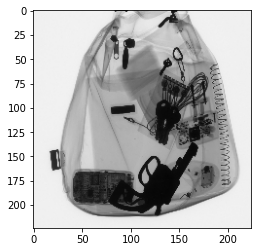

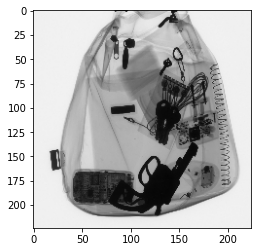

In [0]:
img=load_img('/content/drive/My Drive/Baggages/Baggages/B0046/B0046_0007.png',target_size=(224,224))
plt.imshow(img)
plt.show()
img_array=img_to_array(img)
plt.imshow(np.uint8(img_array))
plt.show()

In [0]:
f_model=load_model('/content/drive/My Drive/Models/VGG19_TL_MOD.h5')

In [0]:
img = cv2.imread('/content/drive/My Drive/Baggages/Baggages/B0046/B0046_0007.png')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

classes =f_model.predict(img)

print(classes)

[[0. 1. 0. 0.]]


In [0]:
history=r
print(history.history.keys())



dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


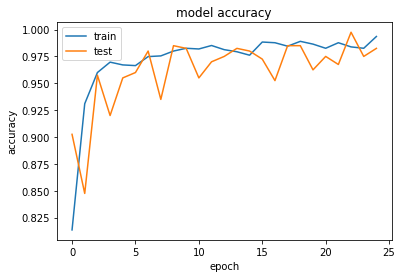

In [0]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

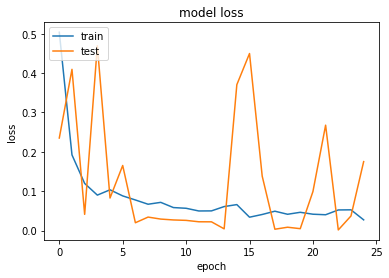

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# New Section